# Bike Sharing Assignment

## Objective

To model the demand for shared bikes using available independent variables, which will be used by management:
 - to understand how exactly the demands vary with different features.
 - to manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
 - to understand the demand dynamics of a new market. 

## Approach

- Step 1:  Reading and Understanding Data 
- Step 2:  Visualizing the Data
- Step 3:  Data Preparation
- Step 4:  Splitting Data into Training and Test Data sets
- Step 5:  Building Linear Models and analysing statistics
- Step 6:  Residual Analysis of Train dataset
- Step 7:  Making Predictions Using the finalized model
- Step 8:  Model Evaluation

### Step 1 :  Reading and Understanding Data

In [355]:
# import requisite libraries for reading data

import numpy as np
import pandas as pd

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [356]:
# read the day.csv file and store in bs dataframe

bs = pd.read_csv("day.csv")

In [357]:
# check the dataset bs

bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Let's first convert the values in categorical variables with corresponding string values for better understanding 

In [358]:
# Defining the map function for season
def binary_map(x):
    return x.map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

# Applying the function to the housing list
bs[['season']] = bs[['season']].apply(binary_map)

In [359]:
# Defining the map function for month
def binary_map(x):
    return x.map({1: "jan", 2: "feb", 3: "mar", 4: "apr", 5: "may", 6: "jun", 7:"jul", 8:"aug", 9:"sep", 10: "oct", 11: "nov", 12: "dec"})

# Applying the function to the housing list
bs[['mnth']] = bs[['mnth']].apply(binary_map)

In [360]:
# Defining the map function for weekday
def binary_map(x):
    return x.map({1: "mon", 2: "tue", 3: "wed", 4: "thu", 5: "fri", 6: "sat", 0: "sun"})

# Applying the function to the housing list
bs[['weekday']] = bs[['weekday']].apply(binary_map)

In [361]:
# Defining the map function for weathersit
def binary_map(x):
    return x.map({1: "clear", 2: "misty", 3: "lightsnow", 4: "heavyrain"})

# Applying the function to the housing list
bs[['weathersit']] = bs[['weathersit']].apply(binary_map)

In [362]:
# Defining the map function for year
def binary_map(x):
    return x.map({1: "2009", 0: "2008"})

# Applying the function to the housing list
bs[['yr']] = bs[['yr']].apply(binary_map)

In [363]:
# Defining the map function for holiday
def binary_map(x):
    return x.map({1: "yes", 0: "no"})

# Applying the function to the housing list
bs[['holiday']] = bs[['holiday']].apply(binary_map)

In [364]:
# Defining the map function for workingday
def binary_map(x):
    return x.map({1: "yes", 0: "no"})

# Applying the function to the housing list
bs[['workingday']] = bs[['workingday']].apply(binary_map)

In [365]:
bs.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2008,jan,no,sat,no,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2008,jan,no,sun,no,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2008,jan,no,mon,yes,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2008,jan,no,tue,yes,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2008,jan,no,wed,yes,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,2008,jan,no,thu,yes,clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,2008,jan,no,fri,yes,misty,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,2008,jan,no,sat,no,misty,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,2008,jan,no,sun,no,clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,2008,jan,no,mon,yes,clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [366]:
# Checking the shape of datasest 
bs.shape

(730, 16)

In [367]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


In [368]:
#Checking the other aspects of dataset bs

bs.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### NOTE:  Weathersit max is 3.  Value 4 corresponding to "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" has not appeared. As we analyse further, we need to decide if only 2 dummy variables can be used instead of 3 dummy variables.  

### Step-2: Visualizing Data

In [369]:
# Importing libraries for visualizing 

import matplotlib.pyplot as plt
import seaborn as sns

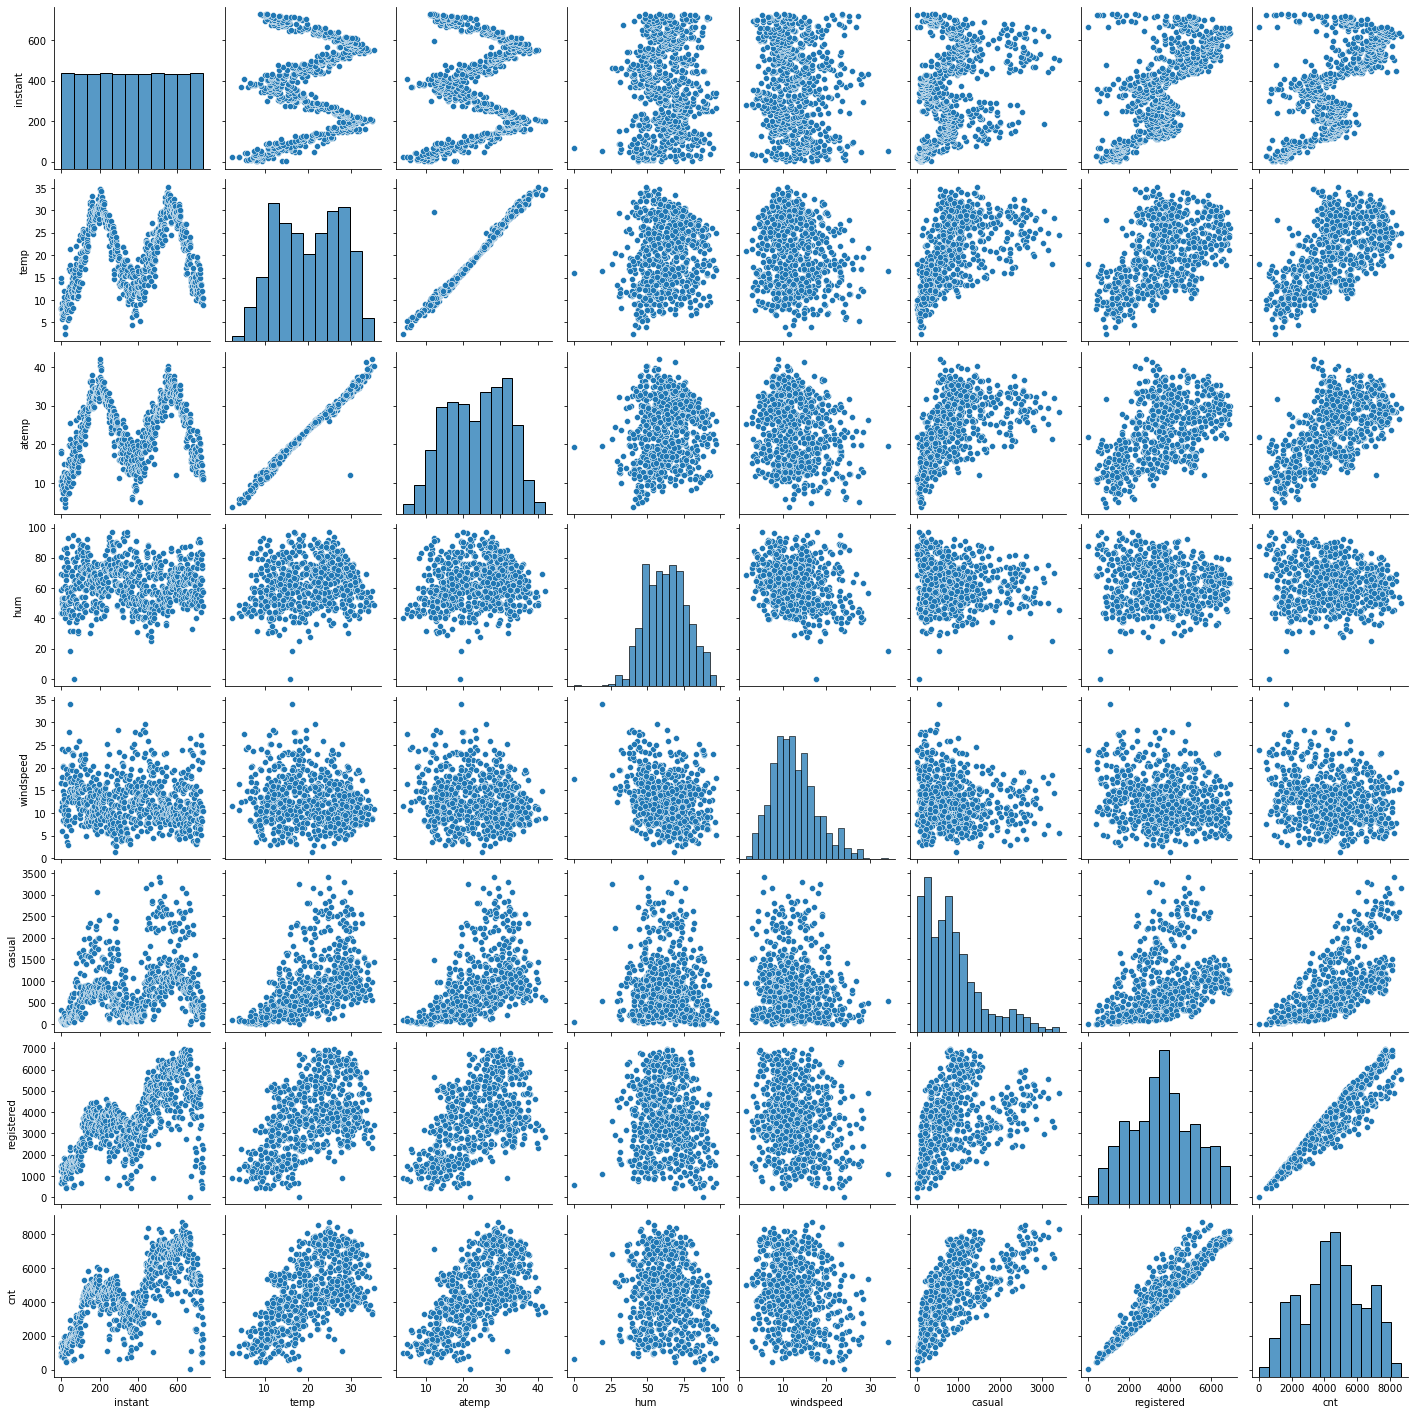

In [370]:
# Visualizing using pairplot

sns.pairplot(bs)
plt.show()


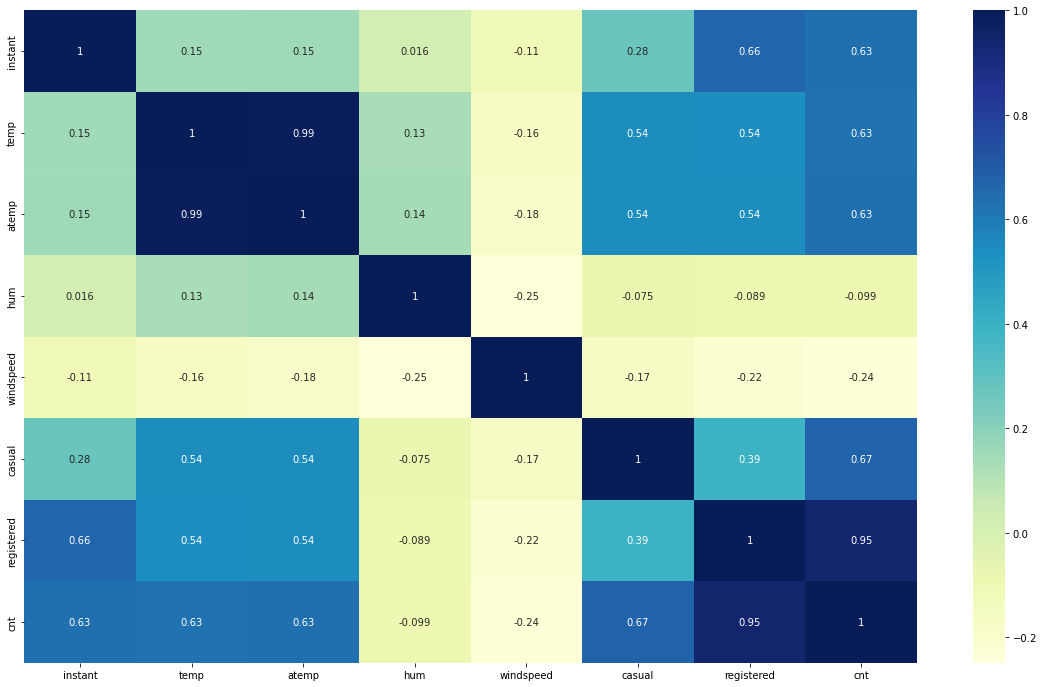

In [371]:
# Visualizing using heatmap

plt.figure(figsize=(20, 12))
sns.heatmap(bs.corr(),cmap="YlGnBu", annot = True)
plt.show()


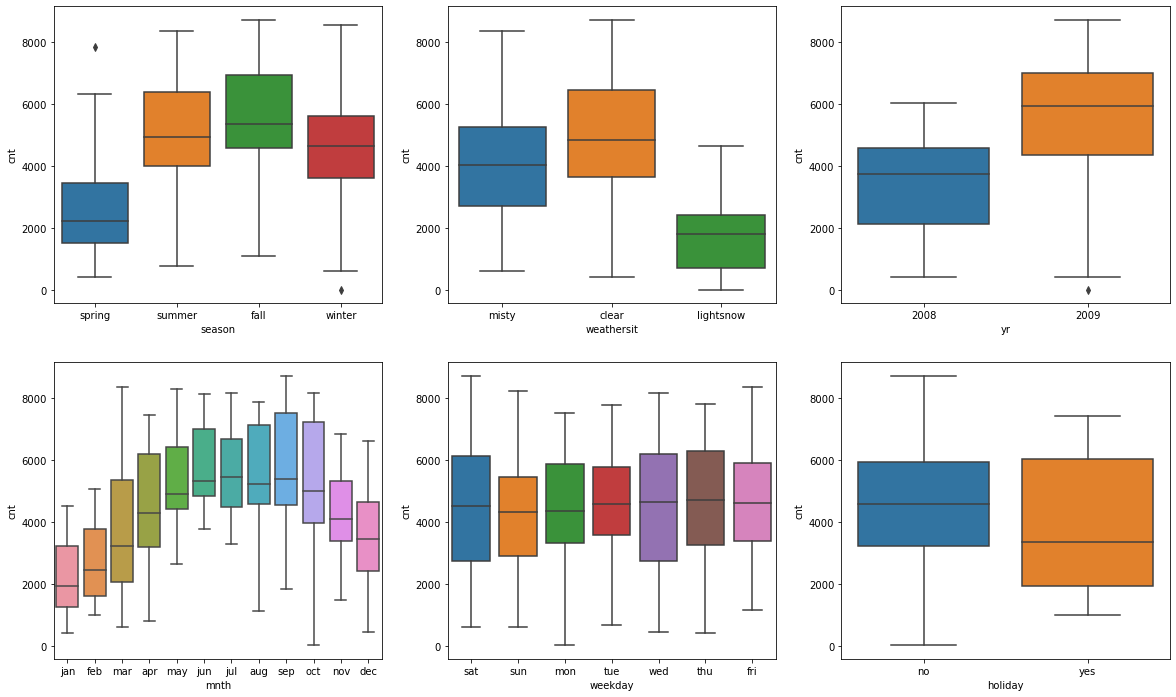

In [372]:
# Visualizing categorical variables overall

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bs)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bs)
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt',data = bs)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt',  data = bs)
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt',  data = bs)
plt.show()

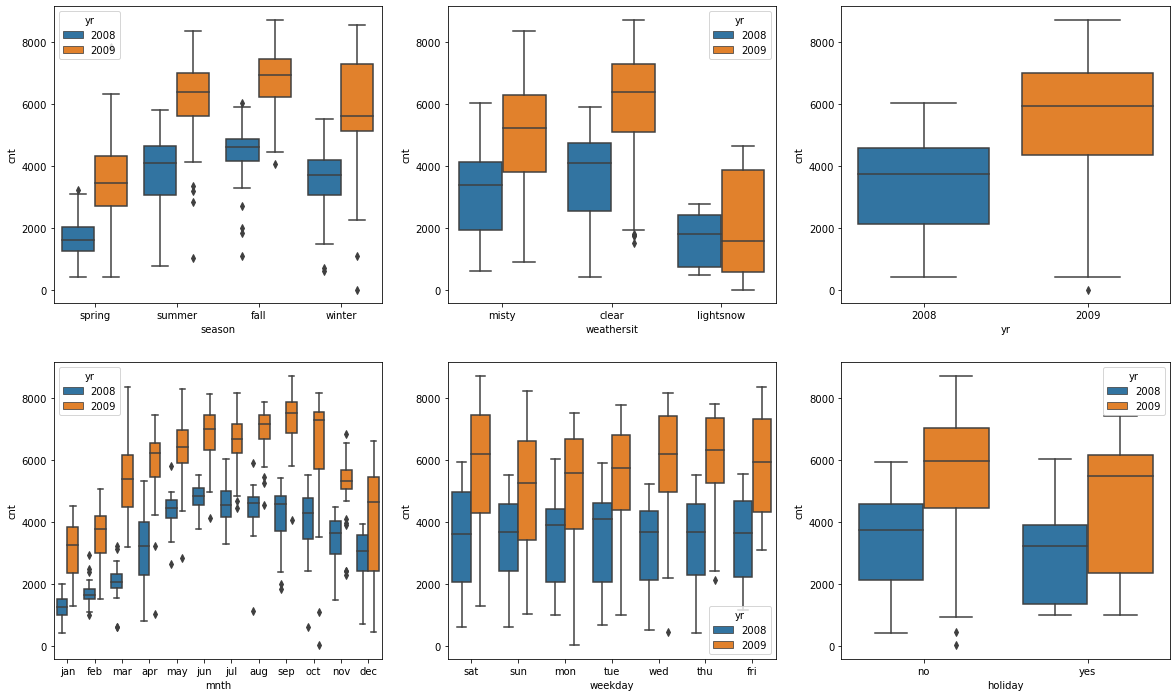

In [373]:
# Visualizing categorical variables yearly

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', hue='yr', data = bs)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = bs)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bs)
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = bs)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'yr', data = bs)
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', hue = 'yr', data = bs)
plt.show()

## Assumptions for further analysis:
 - Dependent variable of interest is 'cnt'.  Registered and Casual are not considered.   
 - Working Day is a variable depend on weekday and holiday (workingday = 0 if (holiday = 1) or (weekday = 6 or 0).  Hence can be removed for further analysis.  
 - Variables 'dteday' and 'instant' won't be used in the analysis.
 - From the above plots, we can see that temp and atemp are highly correlated. However, we still keep it for further analysis
 - Two models shall be generated, one considering year and one without considering year for further study. We shall assume demand growth year-on-year is linear.
 
### Step 3: Data Preparation

### Creating Dummy variables:
     - ['monday', 'tuesday','wednesday','thursday','friday','saturday'] in lieu of 'weekday'
     - ['spring', 'summer','fall'] in lieu of 'season'
     - ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov'] in lieu of 'month'
     - ['clear','misty'] in lieu of 'weathersit';  we are considering only 2 dummy variables as 4th value 'heavyrain' does not at all appear in the given data set. 

In [374]:
# dropping dependent variables 'registered' and 'casual'
# dropping other variables that won't be used in model building 'dteday','instant', 
# dropping variable 'workingday' as it is a derivation of holiday and weekday.  

bs.drop(['casual','registered',"dteday",'instant','workingday'],axis = 1, inplace = True)
bs.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2008,jan,no,sat,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2008,jan,no,sun,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2008,jan,no,mon,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2008,jan,no,tue,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2008,jan,no,wed,clear,9.305237,11.46350,43.6957,12.522300,1600


In [375]:
# creating dummy variables for weekday

status = pd.get_dummies(bs['weekday'])
status = status.drop(axis = 1, columns = 'sun')
bs = pd.concat([bs, status], axis = 1)
bs.drop(['weekday'], axis = 1, inplace = True)
bs.head()

,season,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,cnt,fri,mon,sat,thu,tue,wed
0,spring,2008,jan,no,misty,14.110847,18.18125,80.5833,10.749882,985,0,0,1,0,0,0
1,spring,2008,jan,no,misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0
2,spring,2008,jan,no,clear,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0
3,spring,2008,jan,no,clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,1,0
4,spring,2008,jan,no,clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1


In [376]:
# creating dummy variables for season

status = pd.get_dummies(bs['season'])
status = status.drop(['winter'],1)
bs = pd.concat([bs, status], axis = 1)
bs.drop(['season'], axis = 1, inplace = True)
bs.head()

,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,cnt,fri,mon,sat,thu,tue,wed,fall,spring,summer
0,2008,jan,no,misty,14.110847,18.18125,80.5833,10.749882,985,0,0,1,0,0,0,0,1,0
1,2008,jan,no,misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,1,0
2,2008,jan,no,clear,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,0,1,0
3,2008,jan,no,clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,1,0,0,1,0
4,2008,jan,no,clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1,0,1,0


In [377]:
# creating dummy variables for weathersit

status = pd.get_dummies(bs['weathersit'])
status = status.drop(axis = 1, columns = 'lightsnow')
bs = pd.concat([bs, status], axis = 1)
bs.drop(['weathersit'], axis = 1, inplace = True)
bs.head()


,yr,mnth,holiday,temp,atemp,hum,windspeed,cnt,fri,mon,sat,thu,tue,wed,fall,spring,summer,clear,misty
0,2008,jan,no,14.110847,18.18125,80.5833,10.749882,985,0,0,1,0,0,0,0,1,0,0,1
1,2008,jan,no,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,1,0,0,1
2,2008,jan,no,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,0,1,0,1,0
3,2008,jan,no,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,1,0,0,1,0,1,0
4,2008,jan,no,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1,0,1,0,1,0


In [378]:
# creating dummy variables for month

status = pd.get_dummies(bs['mnth'])
status = status.drop(axis = 1, columns = 'dec')
bs = pd.concat([bs, status], axis = 1)
bs.drop(['mnth'], axis = 1, inplace = True)
bs.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,fri,mon,sat,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
0,2008,no,14.110847,18.18125,80.5833,10.749882,985,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2008,no,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2008,no,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2008,no,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2008,no,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [379]:
# mapping holiday strings with numbers

def binary_map(x):
    return x.map({"yes": 1, "no": 0})

# Applying the function to the housing list
bs[['holiday']] = bs[['holiday']].apply(binary_map)
bs.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,fri,mon,sat,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
0,2008,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2008,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2008,0,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2008,0,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2008,0,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [380]:
# mapping year strings with numbers

def binary_map(x):
    return x.map({"2009": 1, "2008": 0})

# Applying the function to the housing list
bs[['yr']] = bs[['yr']].apply(binary_map)
bs.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,fri,mon,sat,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [381]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yr         730 non-null    int64  
 1   holiday    730 non-null    int64  
 2   temp       730 non-null    float64
 3   atemp      730 non-null    float64
 4   hum        730 non-null    float64
 5   windspeed  730 non-null    float64
 6   cnt        730 non-null    int64  
 7   fri        730 non-null    uint8  
 8   mon        730 non-null    uint8  
 9   sat        730 non-null    uint8  
 10  thu        730 non-null    uint8  
 11  tue        730 non-null    uint8  
 12  wed        730 non-null    uint8  
 13  fall       730 non-null    uint8  
 14  spring     730 non-null    uint8  
 15  summer     730 non-null    uint8  
 16  clear      730 non-null    uint8  
 17  misty      730 non-null    uint8  
 18  apr        730 non-null    uint8  
 19  aug        730 non-null    uint8  
 20  feb       

In [382]:
print(bs.describe())

               yr     holiday        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767   20.319259   23.726322   62.765175   12.763620   
std      0.500343    0.167266    7.506729    8.150308   14.237589    5.195841   
min      0.000000    0.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    0.000000   13.811885   16.889713   52.000000    9.041650   
50%      0.500000    0.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    0.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    1.000000   35.328347   42.044800   97.250000   34.000021   

               cnt         fri         mon         sat  ...         aug  \
count   730.000000  730.000000  730.000000  730.000000  ...  730.000000   
mean   4508.006849    0.142466    0.143836    0.143836  ...    0.084932   
std    1936.011647    0.349767    0.351164   

### Step 4: Spliting Train-Test Data and Rescaling

In [606]:
# import sklearn library and split the bs data set into training set and testing set.  


from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bs, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


#### Rescaling using MinMax Scaling

In [434]:
# import sklearn methods for scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#variables to be scaled
num_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,fri,mon,sat,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
653,1,0,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [435]:
df_train.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,fri,mon,sat,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537262,0.512989,0.650369,0.320768,0.513620,0.127451,0.150980,0.154902,...,0.096078,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.225844,0.212385,0.145882,0.169797,0.224593,0.333805,0.358381,0.362166,...,0.294988,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


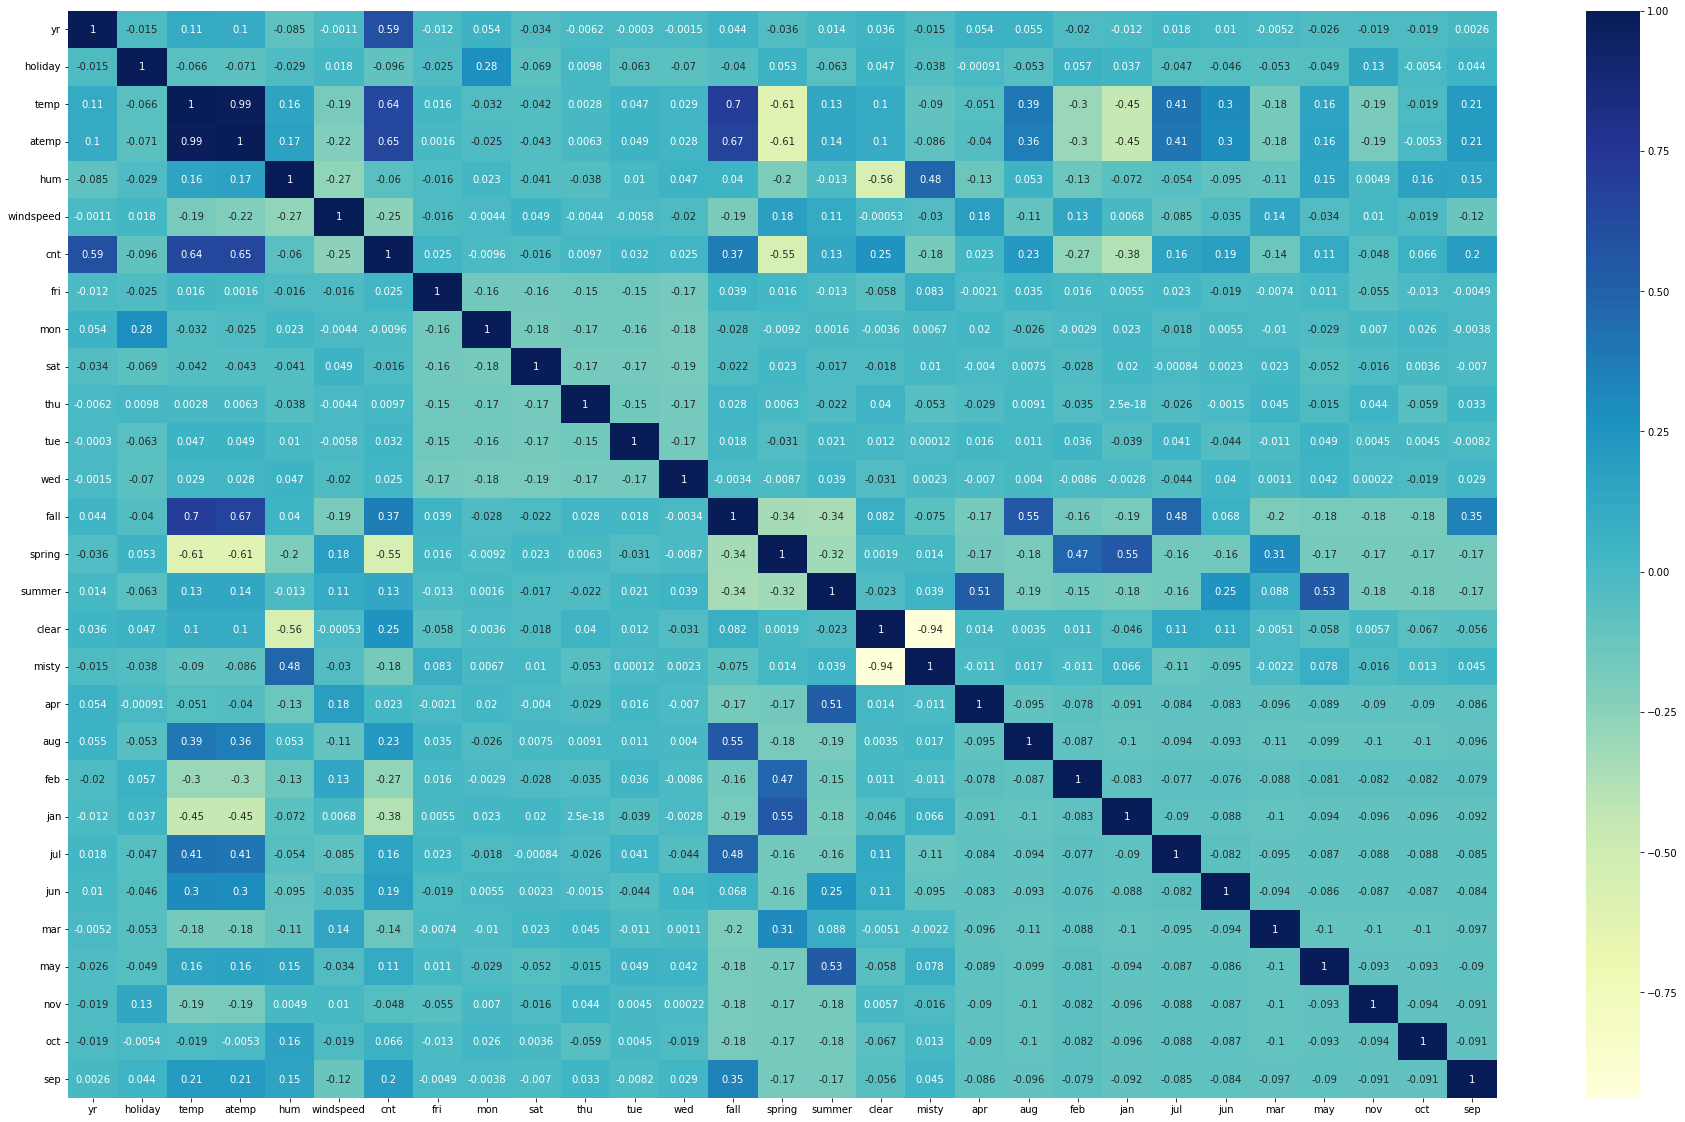

In [436]:
plt.figure(figsize = (32, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

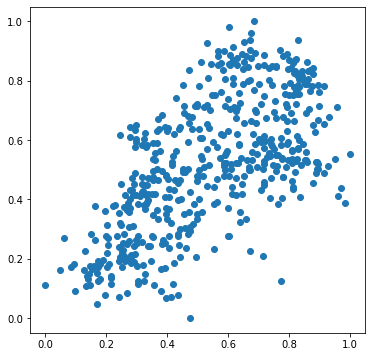

In [437]:
plt.figure(figsize=[6,6])
plt.scatter(df_train["temp"], df_train["cnt"])
plt.show()

In [438]:
# Dividing X and y sets for building models

y_train = df_train.pop('cnt')
X_train = df_train

### Step 5: Building Linear Models

#### Using RFE

In [548]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [549]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [550]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('fri', False, 5),
 ('mon', False, 10),
 ('sat', False, 6),
 ('thu', False, 8),
 ('tue', False, 9),
 ('wed', False, 7),
 ('fall', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('clear', True, 1),
 ('misty', True, 1),
 ('apr', False, 2),
 ('aug', True, 1),
 ('feb', False, 12),
 ('jan', False, 11),
 ('jul', False, 13),
 ('jun', False, 3),
 ('mar', True, 1),
 ('may', True, 1),
 ('nov', False, 14),
 ('oct', True, 1),
 ('sep', True, 1)]

In [551]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'fall', 'spring', 'summer',
       'clear', 'misty', 'aug', 'mar', 'may', 'oct', 'sep'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [552]:
X_train_rfe = X_train[col]

In [553]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [554]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [555]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          2.95e-189
Time:                        20:43:12   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1465      0.044      3.312      0.0

'may' is insignificant in presence of other variables and hence can be dropped. 

In [556]:
X_train_new = X_train_rfe.drop(["may"], axis = 1)

In [557]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [558]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [559]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          9.02e-190
Time:                        20:43:13   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1357      0.044      3.094      0.0

Let's see if model can be improved further by dropping 'summer'

In [560]:
X_train_latest = X_train_new.drop(['const'], axis=1)

In [561]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_latest
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.54
3,hum,18.24
8,clear,11.53
9,misty,8.07
5,fall,6.65
4,windspeed,4.44
7,summer,3.24
6,spring,2.89
0,yr,2.08
10,aug,1.85


In [570]:
X_train_try1 = X_train_new.drop(["temp"], axis = 1)

In [571]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_try1)

In [572]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [573]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     133.6
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.21e-152
Time:                        20:44:39   Log-Likelihood:                 422.20
No. Observations:                 510   AIC:                            -816.4
Df Residuals:                     496   BIC:                            -757.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.052      3.816      0.0

In [574]:
X_train_try2 = X_train_try1.drop(["hum"], axis = 1)

In [575]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_try2)

In [576]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [577]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     144.8
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.50e-153
Time:                        20:45:01   Log-Likelihood:                 421.77
No. Observations:                 510   AIC:                            -817.5
Df Residuals:                     497   BIC:                            -762.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1612      0.032      5.003      0.0

In [578]:
X_train_latest = X_train_try2.drop(['const'], axis=1)

In [579]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_latest
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,clear,5.68
2,windspeed,4.40
7,misty,3.47
3,fall,3.42
4,spring,2.72
5,summer,2.56
0,yr,2.03
8,aug,1.85
11,sep,1.48
10,oct,1.42


In [580]:
X_train_try3 = X_train_try2.drop(["clear"], axis = 1)

In [581]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_try3)

In [582]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [583]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          5.95e-132
Time:                        20:46:55   Log-Likelihood:                 367.90
No. Observations:                 510   AIC:                            -711.8
Df Residuals:                     498   BIC:                            -661.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4645      0.018     26.358      0.0

In [586]:
X_train_latest = X_train_try3.drop(['const'], axis=1)

In [587]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_latest
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.54
3,fall,2.73
4,spring,2.16
5,summer,1.97
0,yr,1.86
7,aug,1.85
6,misty,1.47
10,sep,1.46
8,mar,1.29
9,oct,1.26


In [588]:
X_train_try4 = X_train_try3.drop(["mar"], axis = 1)

In [589]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_try4)

In [590]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [591]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     130.6
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          2.22e-132
Time:                        20:49:44   Log-Likelihood:                 366.38
No. Observations:                 510   AIC:                            -710.8
Df Residuals:                     499   BIC:                            -664.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4638      0.018     26.273      0.0

In [592]:
X_train_latest = X_train_try4.drop(['const'], axis=1)

In [593]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_latest
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.53
3,fall,2.72
4,spring,1.97
5,summer,1.93
0,yr,1.86
7,aug,1.85
6,misty,1.47
9,sep,1.46
8,oct,1.26
1,holiday,1.03


Now all p values are less than 0.05 and VIF values are less than 5

### Step 6:  Residual Analysis of Train dataset

In [594]:
y_train_cnt = lm.predict(X_train_lm)

In [595]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

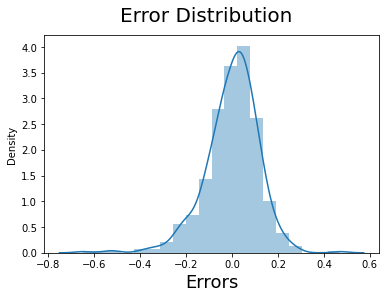

In [615]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Distribution', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Errors are normally distributed with mean 0

### Step 7: Making Predictions Using the finalized model

In [607]:
num_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [608]:
y_test = df_test.pop('cnt')
X_test = df_test
X_train_latest.columns

Index(['yr', 'holiday', 'windspeed', 'fall', 'spring', 'summer', 'misty',
       'aug', 'oct', 'sep'],
      dtype='object')

In [609]:
# Use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_latest.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [610]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [612]:
y_test.describe()

count    219.000000
mean       0.520592
std        0.218435
min        0.048205
25%        0.377531
50%        0.524275
75%        0.672745
max        0.963300
Name: cnt, dtype: float64

### Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

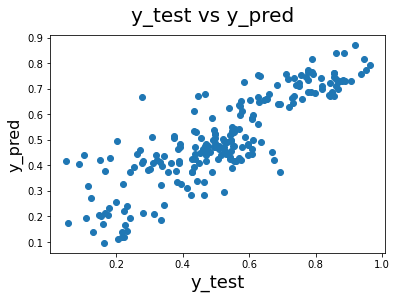

In [613]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Final Model

#### cnt = 0.4638 + 0.2529*yr - 0.0823*holiday - 0.2038*windspeed + 0.0897*fall - 0.1798*spring + 0.0739*summer - 0.0796*misty + 0.0497*aug + 0.0712*oct + 0.0913*sep

In [614]:
# Calculating R2 Score

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7210310436551863